In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 200,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}
mpl.rcParams.update(params)

In [12]:
import numpy, pylab

d = numpy.loadtxt('hmi.txt')


m1v = []
m2v = []
mv = []
vv = []

i = 0
j = 0
ms = []
ss = []
ic = []
for x in d:
    if i==17:
        i = 0
        j += 1
        ms = []
        ss = []
        ic = []
    
    inc = x[0]
    m = x[1]
    fl = x[2]
    
    m1 = x[3]
    m2 = x[4]
    
    s1 = x[5]
    s2 = x[6]
    
    ms.append(m)
    ss.append(s1)
    ic.append(inc)
    i+=1
    
    if i == 17:
        ic = numpy.array(ic)
        ms = numpy.array(ms)
        ss = numpy.array(ss)
        w = numpy.sin(ic) * ss**3.0
        w /= w.sum()
        
        mave = (ms*w).sum()
        vc = (mave **3.0) * (ss[0] / s2) ** 3.0
        
        m1v.append(m1)
        m2v.append(m2)
        mv.append(mave)
        vv.append(vc)
        
        print m1, m1, mave, vc

20.0 20.0 0.9543591651486351 1.029912801933613
20.0 20.0 0.944388619137139 0.9734861449657539
20.0 20.0 0.9441153217229858 0.9489304190258839
20.0 20.0 0.9392375276765775 0.9394922264744439
20.0 20.0 0.9428551243492629 0.9494775689147122
20.0 20.0 0.9456477334601124 0.9330673051129819
20.0 20.0 0.9410915269984835 0.9033822130249817
20.0 20.0 0.9351394314826211 0.8714685029396915
20.0 20.0 0.9246572776315496 0.8373536246413732
20.0 20.0 0.9147943204969989 0.8062203045953541
25.0 25.0 0.9252385098549539 0.9160533042148459
25.0 25.0 0.9209608130566249 0.9039562967377733
25.0 25.0 0.9216756679865272 0.8803427087488462
25.0 25.0 0.9246851062183664 0.9015135531509039
25.0 25.0 0.9227828175519999 0.8928984152953433
25.0 25.0 0.9307242392118501 0.9039398814148233
25.0 25.0 0.9336241611048254 0.893946631727147
25.0 25.0 0.9257202167048196 0.8623271294427451
25.0 25.0 0.921522036822232 0.8339381528454445
25.0 25.0 0.9173389475890154 0.8198523564801812
30.0 30.0 0.9124168646657894 0.8993674027931

(0.01, 1)

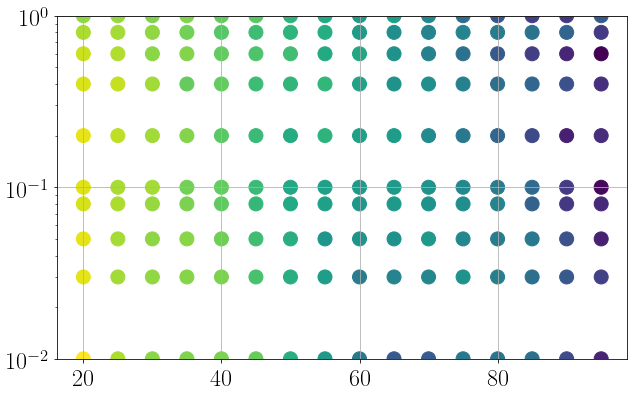

In [13]:
pylab.scatter(m1v, m2v, c=mv)
pylab.yscale('log')
pylab.ylim(.01, 1)

(0.01, 1)

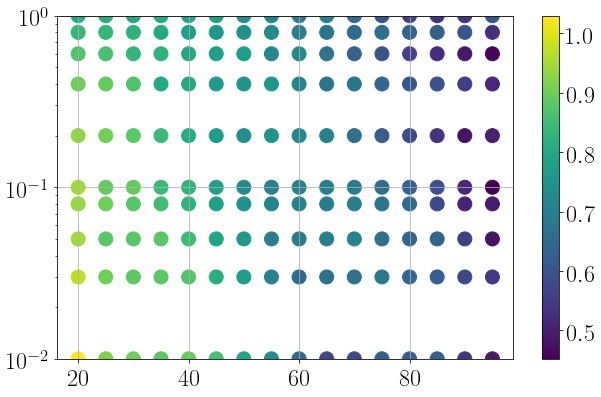

In [14]:
pylab.scatter(m1v, m2v, c=vv)
pylab.yscale('log')
pylab.colorbar()
pylab.ylim(.01, 1)

In [15]:
from scipy.interpolate import interp2d

vcinterp = interp2d(m1v, m2v, vv)

In [16]:
import glob, h5py
fnames = glob.glob('injs/*.hdf')

n = 0 
n2 = 0

m1 = []
m2 = []
dist = []
found = []
missed = []
ifar = []

for fname in fnames:
    f = h5py.File(fname, 'r')
    n += len(f['found/ifar_exc'])
    n2 += len(f['missed/after_vetoes'])
    
    m1.append(f['injections/mass1'][:])
    m2.append(f['injections/mass2'][:])
    dist.append(f['injections/distance'][:])
    ifar.append(f['found/ifar_exc'][:])
    
    fo = f['found/injection_index'][:]
    fo2 = numpy.zeros(len(f['injections/mass1']), dtype=bool)
    fo2[fo] = True
    
    mo = f['missed/after_vetoes'][:]
    mo2 = numpy.zeros(len(f['injections/mass1']), dtype=bool)
    mo2[mo] = True

    
    found.append(fo2)
    missed.append(mo2)
    
print n, n2, n+n2
    
ifar = numpy.concatenate(ifar)
m1 = numpy.concatenate(m1)
m2 = numpy.concatenate(m2)
dist = numpy.concatenate(dist)
found = numpy.concatenate(found)
missed = numpy.concatenate(missed)

found[found] = (ifar > 0.3)
 
from pycbc.conversions import mchirp_from_mass1_mass2

mc = mchirp_from_mass1_mass2(m1, m2)

print missed.sum(), found.sum()
    
#pylab.scatter(m1, m2, s=.01)
#pylab.yscale('log')
#pylab.ylim(.01, 1)
#pylab.xscale('log')

42494 96982 139476
96982 37829


[34.90488096 42.26547515 28.3174335  72.63986189 40.66740667 49.03081753
 30.67101499 44.00194876 30.28177883 36.38007095 28.96501014 37.51602353
 25.80243191 31.81874667 25.08012403 36.99695605 56.9280487  33.38550542
 32.30484059]
37.787282961957295


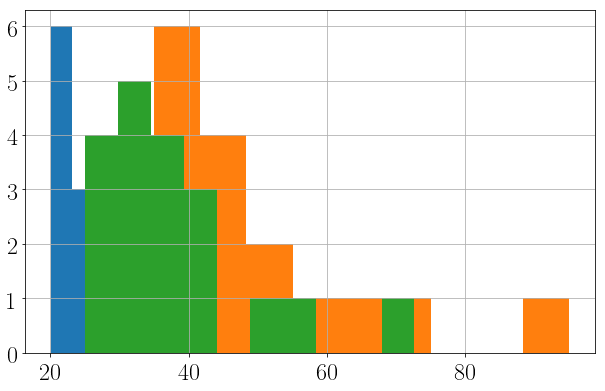

In [17]:
import h5py, numpy, glob

fnames = glob.glob('../2-ogc/posterior_samples/*.hdf')

ms = []
for fname in fnames:
    ord = int(fname.split('-')[-2])
    if ord >= 14:
        continue
    
    f = h5py.File(fname, 'r')
    
    m1x = f['samples']['mass1'][:]
    m2x = f['samples']['mass2'][:]
    
    ml, mh = numpy.percentile(m1x, [5, 95])
    ms.append((ml, mh))
    
    ml, mh = numpy.percentile(m2x, [5, 95])
    ms.append((ml, mh))
    
ms = numpy.array(ms)

ml = ms[:,0]
mh = ms[:,1]

mh = mh[ml > 20.0]
ml = ml[ml > 20.0]

ma = (mh + ml) / 2.0

print ma
print ma.mean()

pylab.hist(ml)
pylab.hist(mh)
_ = pylab.hist(ma)

20 [[5.50979530e+02]
 [7.61668332e+02]
 [1.36117350e+03]
 [2.88173342e+03]
 [1.27408627e+04]
 [5.36788942e+04]
 [1.37996220e+05]
 [1.21270348e+06]] [6.50294376e+02 8.51725702e+02 1.52824878e+03 3.25444675e+03
 1.41464325e+04 6.12940537e+04 1.58346675e+05 1.51391646e+06] [4.77980899e+02 6.88834313e+02 1.22702897e+03 2.58561733e+03
 1.15893600e+04 4.77468378e+04 1.22280881e+05 1.01146052e+06]
50 [[5.26810643e+02]
 [1.13888543e+03]
 [2.31445781e+03]
 [5.26568626e+03]
 [3.13673624e+04]
 [9.58074275e+04]
 [2.10870062e+05]
 [2.03814011e+06]] [6.25339269e+02 1.30026800e+03 2.64546708e+03 5.88871484e+03
 3.55458126e+04 1.08593273e+05 2.39185528e+05 2.60607481e+06] [4.55104287e+02 1.01313974e+03 2.05707059e+03 4.76187756e+03
 2.80679441e+04 8.57152551e+04 1.88549083e+05 1.67344980e+06]
100 [[4.69568184e+03]
 [1.16940899e+04]
 [1.83382628e+04]
 [4.22278489e+04]
 [1.78716719e+05]
 [8.71358772e+05]
 [3.02279667e+06]
 [2.32205528e+07]] [6.32975460e+03 1.49681832e+04 2.46488467e+04 5.35867839e+04
 2

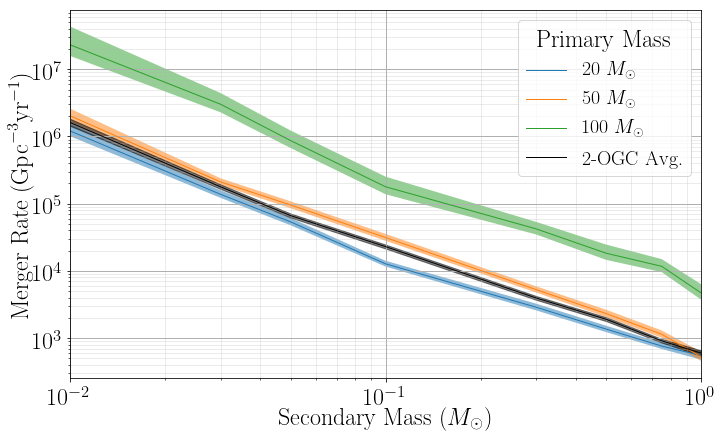

In [28]:
from pycbc.sensitivity import volume_montecarlo, volume_to_distance_with_errors
import matplotlib.colors as colors
import matplotlib.ticker
import numpy

pylab.figure()

nbin1 = 8
nbin2 = 19
m1e = numpy.logspace(numpy.log10(20), 2, nbin1+1)
m2e = numpy.logspace(-2, 0, nbin2+1)

fac = 1.1
mp1 = [20, 50, 100]
mp2 = [1, .75, .5, .3, .1, .05, .03, .01]

for m1v in mp1:
    r = []
    rl = []
    rh = []
    for m2v in mp2:
        region = (m1 < m1v * fac) & (m1 >= m1v / fac) & (m2 < m2v * fac) & (m2 >= m2v / fac)

        fd = dist[found & region]
        md = dist[missed & region]

        fmc = mc[found & region]
        mmc = mc[missed & region]

        v, e = volume_montecarlo(fd, md, fmc, mmc, 'chirp_distance', 'uniform', 'chirp_distance')
            
        vf = vcinterp(m1v, m2v)
        v*= vf * 1e-9
        e*= vf * 1e-9
        
        d, el, eh = volume_to_distance_with_errors(v, e)
        
        t = 164 / 365.25
        
        r.append(2.3 / (t * v))
        rh.append(2.3 / (t * (v-e)))
        rl.append(2.3 / (t * (v+e)))
        
    r = numpy.array(r)
    rh = numpy.array(rh).flatten()
    rl = numpy.array(rl).flatten()
    
    print m1v, r, rh, rl
    numpy.savetxt('rate_%s.txt' % m1v, r)
    
    pylab.fill_between(mp2, rl, rh, alpha=0.5)
    pylab.plot(mp2, r, label="%i $M_\\odot$" % m1v, linewidth=1)
    

r2 = []
rl2 = []
rh2 = []
for m2v in mp2:
    r = []
    rl = []
    rh = []
    for mlv, mhv in zip(ml, mh):
        region = (m1 < mhv) & (m1 >= mlv) & (m2 < m2v * fac) & (m2 >= m2v / fac)

        #print region.sum()
        fd = dist[found & region]
        md = dist[missed & region]

        fmc = mc[found & region]
        mmc = mc[missed & region]

        v, e = volume_montecarlo(fd, md, fmc, mmc, 'chirp_distance', 'uniform', 'chirp_distance')
        
        m1c = 0.5 * (mhv + mlv)
        m2c = m2v
        vf = vcinterp(m1c, m2c)
        v*= vf * 1e-9
        e*= vf * 1e-9
        
        d, el, eh = volume_to_distance_with_errors(v, e)
        
        t = 164 / 365.25
        
        r.append(2.3 / (t * v))
        rh.append(2.3 / (t * (v-e)))
        rl.append(2.3 / (t * (v+e)))
        
    r = numpy.array(r).mean()
    rh = numpy.array(rh).flatten().mean()
    rl = numpy.array(rl).flatten().mean()
    
    r2.append(r)
    rl2.append(rl)
    rh2.append(rh)
    
print mp2, r2
numpy.savetxt('rate.txt', numpy.column_stack([mp2, r2, rl2, rh2]))
    
pylab.fill_between(mp2, rl2, rh2, alpha=0.5, color='black')
pylab.plot(mp2, r2, label="2-OGC Avg.", linewidth=1, color='black')
    
pylab.yscale('log')
pylab.xscale('log')
pylab.grid(which='major', linewidth=1)
pylab.grid(which='minor', alpha=0.5, linewidth=0.5)
pylab.xlim(.01, 1)
pylab.legend(title='Primary Mass')   
pylab.tight_layout()
pylab.ylabel('Merger Rate ($\mathrm{Gpc}^{-3} \mathrm{yr}^{-1}$)', labelpad=-1)
pylab.xlabel('Secondary Mass ($M_\\odot$)', labelpad=0)
pylab.savefig('rate.pdf')